We evaluate the popularity of an app based on the number of installs and rating score as our response variable. Note that we may modify the data slightly since some apps don't have a rating score yet. In those cases, we will focus more on number of installs. 

However, we also note that predicting the number of installs may result in a high MSE since it's hard to predict the exact number precisely, so our goals changed to only predict rating.  

## 1. Decision trees

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,Normalizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn import decomposition
import warnings
warnings.filterwarnings('ignore') #suppress any warnings


In [2]:
# load the data
import pandas as pd
data = pd.read_csv('Google-Playstore.csv')
data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


# Pre-Processing data

In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

We check the column names and data type:

In [4]:
columns=data.columns
columns,len(columns)

(Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
        'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
        'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
        'Developer Email', 'Released', 'Last Updated', 'Content Rating',
        'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
        'Scraped Time'],
       dtype='object'),
 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

View data for data processing:

In [6]:
data['Released'].head()

0    Feb 26, 2020
1    May 21, 2020
2     Aug 9, 2019
3    Sep 10, 2018
4    Feb 21, 2020
Name: Released, dtype: object

In [7]:
data['Last Updated'].head()

0    Feb 26, 2020
1    May 06, 2021
2    Aug 19, 2019
3    Oct 13, 2018
4    Nov 12, 2018
Name: Last Updated, dtype: object

In [8]:
data['Minimum Android'].head()

0      7.1 and up
1      5.0 and up
2    4.0.3 and up
3    4.0.3 and up
4      4.1 and up
Name: Minimum Android, dtype: object

Columns like App Id, Developer Id, Developer Email, Released (release date), Last Updated (last update date), Privacy Policy, Scraped Time are logistical information and are not relevant to our studies, so we can drop them first. The time an app was released and updated has little to do with how popular there are, for example, an app with minimal function such as Cisco Any Connect may not be updated regularly due to the simplisticity of its functions, but it's still used by many clients from various domains. In addition, there's often not a seasonal, time-based pattern in app download frequencies, so doing a time series analysis may not be useful.   
We are assuming the name of the App (App Name) and the Developer Website has nothing to do with the popularity of the app because users on the mobile end typically do not look up the developer's website to decide if they want to install the app or not. They rely on reviews and category in the app store to determine if the app is useful more often, and the app has been verified by the app store so most are legit. However, **this is a limitation as well.** Popular apps like Instagram developed by well-known companies are more likely to get higher rating. However, coming up with a weighting scheme corresponding to an app or company's popularity can be tricky and subjective, which can also introduce bias for newer apps, so we decided not to do this. A possible future study is to do Natural Language Processing incorporating **external data** such as a list of trending apps or top software companies.   
We are also assuming the software version ('Minimum Android') is not relevant right now, because users with a lower version tend to update so that they can download the app. However, those with older phones may not be able to do so, so this may affect people with older devices or who are reluctant to update due to various reasons. For now, we are asssuming this population is relatively small, because Android has better combatibility for older phones than iPhones. **If this becomes an issue later, we will incorporate this into our analysis.**

In [9]:
data = data.drop(["App Name", "App Id", "Developer Id", "Developer Website",
                  "Developer Email","Released","Last Updated","Privacy Policy",
                  "Scraped Time","Minimum Android"], axis = 1)
data.head()

,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,Everyone,False,False,False
1,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,Everyone,True,False,False
2,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,Everyone,False,False,False
3,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,Everyone,True,False,False
4,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,Everyone,False,False,False


In [147]:
data

,Category,Rating,Maximum Installs,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice,Installs x Editors,Size x Purchases
0,Adventure,0.0,15,0.0,10.0,Everyone,False,False,False,15,10.0
1,Tools,4.4,7662,0.0,2.0,Everyone,True,False,False,7662,2.0
2,Productivity,0.0,58,0.0,3.0,Everyone,False,False,False,58,3.0
3,Communication,5.0,19,0.0,1.0,Everyone,True,False,False,19,1.0
4,Tools,0.0,478,0.0,6.0,Everyone,False,False,False,478,6.0
...,...,...,...,...,...,...,...,...,...,...,...
2312939,Role Playing,4.3,337109,0.0,77.0,Teen,False,False,False,337109,77.0
2312940,Education,0.0,430,0.0,44.0,Everyone,False,False,False,430,44.0
2312941,Education,0.0,202,0.0,29.0,Everyone,False,False,False,202,29.0
2312942,Music & Audio,3.5,2635,0.0,10.0,Everyone,True,False,False,2635,10.0


Observing the data now, we see 3 columns related to installs: Installs, Minimum Installs, and Maximum Installs. Minimum Installs and Installs are the same: they are the rounded down number displayed to the user upon searching. The actual number of installs should be Maximum Installs. Therefore, we drop Installs and Minimum Installs.

In [10]:
data = data.drop(["Installs","Minimum Installs"], axis = 1)
data.head()

,Category,Rating,Rating Count,Maximum Installs,Free,Price,Currency,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,0.0,15,True,0.0,USD,10M,Everyone,False,False,False
1,Tools,4.4,64.0,7662,True,0.0,USD,2.9M,Everyone,True,False,False
2,Productivity,0.0,0.0,58,True,0.0,USD,3.7M,Everyone,False,False,False
3,Communication,5.0,5.0,19,True,0.0,USD,1.8M,Everyone,True,False,False
4,Tools,0.0,0.0,478,True,0.0,USD,6.2M,Everyone,False,False,False


We see there's a column of currency. It's important to standardize different form of currencies for accurate predictions as the app is used around the world, and 1 dollar is about 140 Japanese yen, for example.

In [11]:
data['Currency'].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', nan, 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [12]:
data['Currency'].value_counts(dropna=False)

USD    2311548
XXX       1236
NaN        135
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: Currency, dtype: int64

We see there are missing (NaN) values, but there are only 135 of them out of our data of over 2310000 entries, so we can impute them after we standardize the currency. There are also those with currency XXX:

In [13]:
xxx=data[data['Currency']=='XXX'][["Price","Currency","Free"]]
xxx

,Price,Currency,Free
19,0.0,XXX,True
32,0.0,XXX,True
67,0.0,XXX,True
181,0.0,XXX,True
191,0.0,XXX,True
...,...,...,...
1204740,0.0,XXX,True
1204991,0.0,XXX,True
1205662,0.0,XXX,True
1205695,0.0,XXX,True


In [14]:
xxx[xxx["Free"]==False]

,Price,Currency,Free


After some research, XXX often stands for transactions where no currency is involved. In our case, it seems like all apps with currency XXX are free. There's not one row where the Free column is false.  
Wikipedia: https://en.wikipedia.org/wiki/ISO_4217#:~:text=The%20code%20XXX%20is%20used,by%20the%20International%20Monetary%20Fund.  
International Organization for Standardization: https://www.iso.org/iso-4217-currency-codes.html

In [15]:
data[data["Currency"]!="USD"].head()

,Category,Rating,Rating Count,Maximum Installs,Free,Price,Currency,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
19,Books & Reference,0.0,0.0,2,True,0.0,XXX,11M,Mature 17+,True,False,False
32,Photography,2.5,21.0,8984,True,0.0,XXX,6.2M,Everyone,True,False,False
67,Education,0.0,0.0,186,True,0.0,XXX,32M,Everyone,False,False,False
181,Entertainment,0.0,0.0,670,True,0.0,XXX,8.1M,Everyone,True,False,False
191,Shopping,0.0,0.0,2,True,0.0,XXX,3.6M,Everyone,False,False,False


At a first glance, we suspect that apps in non-USD currency might be free since the Free column is True, and Price is 0. We see the value frequencies to make sure:

In [16]:
data[data["Currency"]!="USD"]["Price"].value_counts(dropna=False)

0.0    1396
Name: Price, dtype: int64

Therefore, we can standardize them to USD without any conversion now since they are all free. Even apps whose currency is missing are free, so we can let all currency be USD. However, we should check again when there's a new batch of data.

In [17]:
data["Currency"]="USD"
data["Currency"].value_counts(dropna=False)

USD    2312944
Name: Currency, dtype: int64

In [18]:
data[data.isnull().any(axis=1)].head()

,Category,Rating,Rating Count,Maximum Installs,Free,Price,Currency,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
115,Tools,NaN,NaN,71,True,0.0,USD,Varies with device,Everyone,False,False,False
210,Productivity,NaN,NaN,135,True,0.0,USD,Varies with device,Everyone,False,False,False
284,Entertainment,NaN,NaN,14,True,0.0,USD,Varies with device,Mature 17+,False,False,False
501,Communication,NaN,NaN,92,True,0.0,USD,Varies with device,Everyone,False,False,False
662,Tools,NaN,NaN,18,True,0.0,USD,Varies with device,Everyone,False,False,False


In [19]:
#transform size into float
data["Size"] = data["Size"].str.extract(r'(\d+)').astype(float)
data

,Category,Rating,Rating Count,Maximum Installs,Free,Price,Currency,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,0.0,15,True,0.0,USD,10.0,Everyone,False,False,False
1,Tools,4.4,64.0,7662,True,0.0,USD,2.0,Everyone,True,False,False
2,Productivity,0.0,0.0,58,True,0.0,USD,3.0,Everyone,False,False,False
3,Communication,5.0,5.0,19,True,0.0,USD,1.0,Everyone,True,False,False
4,Tools,0.0,0.0,478,True,0.0,USD,6.0,Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,Role Playing,4.3,16775.0,337109,True,0.0,USD,77.0,Teen,False,False,False
2312940,Education,0.0,0.0,430,True,0.0,USD,44.0,Everyone,False,False,False
2312941,Education,0.0,0.0,202,True,0.0,USD,29.0,Everyone,False,False,False
2312942,Music & Audio,3.5,8.0,2635,True,0.0,USD,10.0,Everyone,True,False,False


In [20]:
data["Size"].min(skipna=True) # the smallest value not counting NAs is 1.0, so all sizes are in the Megabytes,
# there was no problem in our previous transformation

1.0

We see there are missing values in rating and rating count. After converting to numerical values, apps whose size was "Varies with device" also has NaN now, so we impute these columns.

In [21]:
avg_rating = data["Rating"].mean()
avg_rating_ct = data["Rating Count"].mean()
avg_size = data["Size"].mean()
data["Rating"].fillna(avg_rating, inplace = True)
data["Rating Count"].fillna(avg_rating_ct, inplace = True)
data["Size"].fillna(avg_size, inplace = True)

We check we have no more NaN's:

In [22]:
data[data.isnull().any(axis=1)].head()

,Category,Rating,Rating Count,Maximum Installs,Free,Price,Currency,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice


In [23]:
# After standardizing all currency to USD, we can remove the Currency column
data=data.drop("Currency", axis = 1)
data.head()

,Category,Rating,Rating Count,Maximum Installs,Free,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,0.0,15,True,0.0,10.0,Everyone,False,False,False
1,Tools,4.4,64.0,7662,True,0.0,2.0,Everyone,True,False,False
2,Productivity,0.0,0.0,58,True,0.0,3.0,Everyone,False,False,False
3,Communication,5.0,5.0,19,True,0.0,1.0,Everyone,True,False,False
4,Tools,0.0,0.0,478,True,0.0,6.0,Everyone,False,False,False


If an app is free, the price is 0. If it is not free, the price column will be some non-zero number. Therefore, there can be some correlation between these two features since we can get some information for one variable from the other. Thus, we should remove "Free" since it provides less information about the price.

In [24]:
data=data.drop("Free", axis = 1)
data.head()

,Category,Rating,Rating Count,Maximum Installs,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,0.0,15,0.0,10.0,Everyone,False,False,False
1,Tools,4.4,64.0,7662,0.0,2.0,Everyone,True,False,False
2,Productivity,0.0,0.0,58,0.0,3.0,Everyone,False,False,False
3,Communication,5.0,5.0,19,0.0,1.0,Everyone,True,False,False
4,Tools,0.0,0.0,478,0.0,6.0,Everyone,False,False,False


Then, we can run a correlation matrix:

<AxesSubplot:>

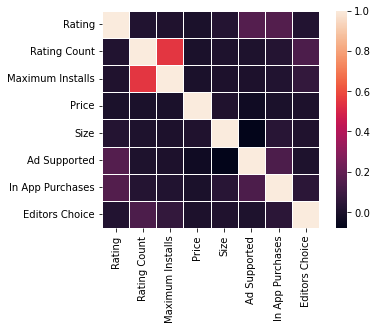

In [25]:
corr_matrix = data.corr()
import seaborn as sns
sns.heatmap(corr_matrix, linewidths=.5,square=True)

There are some correlations between Maximum Installs and Rating Count, which makes sense: an app is likely to have more ratings if it was installed frequently. We can remove either. We remove Rating Count since it likely tells us information about Maximum Installs: the more the install, the more the rating.

In [26]:
# I explored keeping rating count, but it yielded a high MSE. relevant code was commented out
# data_w_rating_ct=data
# data_w_rating_ct.head()

In [27]:
data = data.drop(["Rating Count"], axis = 1)

<AxesSubplot:>

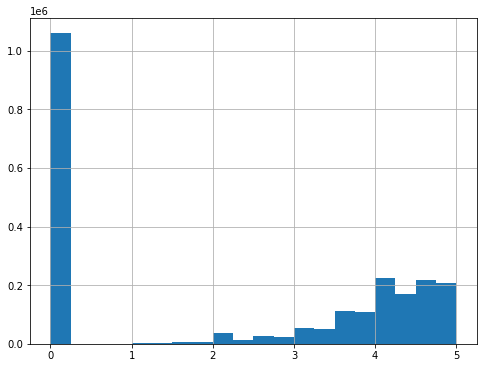

In [28]:
data["Rating"].hist(bins = 20, figsize=(8,6))

<AxesSubplot:>

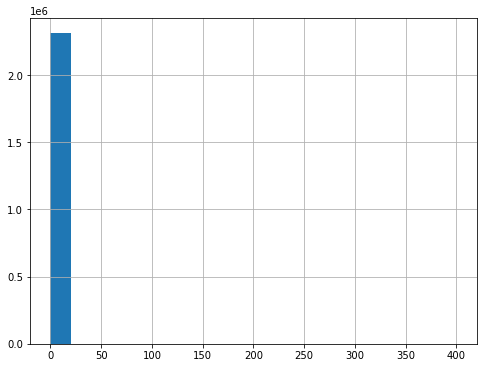

In [29]:
data["Price"].hist(bins = 20, figsize=(8,6))

For most apps, there are no ratings and are free, which correspond to the real world case. Other than a few popular apps, other apps have significantly fewer users and therefore ratings. We shouldn't artificially balance this dataset since it represents the real world scenario.

In [30]:
data['Ad Supported'].value_counts(dropna=False)

False    1162170
True     1150774
Name: Ad Supported, dtype: int64

In [31]:
data['In App Purchases'].value_counts(dropna=False)

False    2117635
True      195309
Name: In App Purchases, dtype: int64

In [32]:
data['Editors Choice'].value_counts(dropna=False)

False    2312091
True         853
Name: Editors Choice, dtype: int64

There are some class imbalances for App Purchases and Editors Choice. However, we shouldn't artificially balance them since this reflects their distribution in the real world: there are significant but comparatively fewer apps that support in app purchases then those who don't. Many apps are developed by startups or individuals who haven't supported these functions yet or are still in the process of attracting user base, so their apps are free. Similarly, only a few top apps are awarded Editors Choice.

In [33]:
data.head()

,Category,Rating,Maximum Installs,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,15,0.0,10.0,Everyone,False,False,False
1,Tools,4.4,7662,0.0,2.0,Everyone,True,False,False
2,Productivity,0.0,58,0.0,3.0,Everyone,False,False,False
3,Communication,5.0,19,0.0,1.0,Everyone,True,False,False
4,Tools,0.0,478,0.0,6.0,Everyone,False,False,False


We first predict the number of installs from other features. Thus, we should drop rating because it will be a response variable we are predicting next.

In [34]:
y=data["Maximum Installs"]
x=data.drop(["Maximum Installs","Rating"], axis=1)
x.head()

,Category,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,10.0,Everyone,False,False,False
1,Tools,0.0,2.0,Everyone,True,False,False
2,Productivity,0.0,3.0,Everyone,False,False,False
3,Communication,0.0,1.0,Everyone,True,False,False
4,Tools,0.0,6.0,Everyone,False,False,False


In [35]:
x["Content Rating"].value_counts(dropna=False)

Everyone           2022089
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: Content Rating, dtype: int64

Encode categorical features and scale numerical features:

In [36]:
cat_feature = ["Category", "Content Rating"]
binary_feature = ["Ad Supported", "In App Purchases", "Editors Choice"]
num_feature = ["Price", "Size"]


le = preprocessing.LabelEncoder()

In [37]:
for i in binary_feature:
    x[i] = le.fit_transform(x[i])
x.head()

,Category,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,10.0,Everyone,0,0,0
1,Tools,0.0,2.0,Everyone,1,0,0
2,Productivity,0.0,3.0,Everyone,0,0,0
3,Communication,0.0,1.0,Everyone,1,0,0
4,Tools,0.0,6.0,Everyone,0,0,0


In [38]:
# now, we use a data pipeline to integrate the labeling and scaling of categorical and numerical features,
# which are rather non-trivial tasks
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_feature),
        ("cat", OneHotEncoder(), cat_feature), 
    #OneHot encodes whether something is present or not
    ])
# x[num_feature] = num_pipeline.fit_transform(x[num_feature])
x = full_pipeline.fit_transform(x)
x

<2312944x56 sparse matrix of type '<class 'numpy.float64'>'
	with 9251776 stored elements in Compressed Sparse Row format>

In [39]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [40]:
train_x

<1850355x56 sparse matrix of type '<class 'numpy.float64'>'
	with 7401420 stored elements in Compressed Sparse Row format>

## Decision Tree for Maximum Install

In [41]:
# use pca to reduce the dimension and speed up training
from sklearn import decomposition
pca = decomposition.PCA(n_components=6)
#toarray() to resolve pca not supporting sparse data
train_x = pca.fit_transform(train_x.toarray()) 

In [42]:
test_x = pca.transform(test_x.toarray())

In [43]:
clf = DecisionTreeRegressor()
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

In [44]:
score = clf.score(train_x,train_y)
print("R-squared: ", score)
mse = mean_squared_error(test_y, predicted)
print("mse is: ", mse) # with one hot encoding, mean squared error is pretty high, but lower than label encoding

R-squared:  0.017849842310248776
mse is:  287285756300807.94


We see that predicting installs lead to a really high MSE - this is because it's hard to predict a install number precisely (to the integers). Therefore, the MSE adds up for the 2300000+ data. We then try using data without dropping Rating Count:

In [51]:
# y=data_w_rating_ct["Maximum Installs"]
# x=data_w_rating_ct.drop(["Maximum Installs","Rating"], axis=1)
# x.head()

,Category,Rating Count,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,0.0,10.0,Everyone,False,False,False
1,Tools,64.0,0.0,2.0,Everyone,True,False,False
2,Productivity,0.0,0.0,3.0,Everyone,False,False,False
3,Communication,5.0,0.0,1.0,Everyone,True,False,False
4,Tools,0.0,0.0,6.0,Everyone,False,False,False


In [52]:
# cat_feature = ["Category", "Content Rating"]
# binary_feature = ["Ad Supported", "In App Purchases", "Editors Choice"]
# num_feature = ["Rating Count","Price", "Size"]

# le = preprocessing.LabelEncoder()

# for i in binary_feature: #process binary features
#     x[i] = le.fit_transform(x[i])
# x.head()

,Category,Rating Count,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,0.0,10.0,Everyone,0,0,0
1,Tools,64.0,0.0,2.0,Everyone,1,0,0
2,Productivity,0.0,0.0,3.0,Everyone,0,0,0
3,Communication,5.0,0.0,1.0,Everyone,1,0,0
4,Tools,0.0,0.0,6.0,Everyone,0,0,0


In [53]:
# num_pipeline = Pipeline([
#         ('std_scaler', StandardScaler())
#     ])
# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_feature),
#         ("cat", OneHotEncoder(), cat_feature), 
#     #OneHot encodes whether something is present or not
#     ])
# # x[num_feature] = num_pipeline.fit_transform(x[num_feature])
# x = full_pipeline.fit_transform(x)
# x

<2312944x57 sparse matrix of type '<class 'numpy.float64'>'
	with 11564720 stored elements in Compressed Sparse Row format>

In [54]:
# train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [55]:
# train_x = pca.fit_transform(train_x.toarray()) # n_components =6
# test_x = pca.transform(test_x.toarray())

In [56]:
# clf = DecisionTreeRegressor()
# clf.fit(train_x, train_y)
# predicted = clf.predict(test_x)

In [57]:
# score = clf.score(train_x,train_y)
# print("R-squared: ", score)
# mse = mean_squared_error(test_y, predicted)
# print("mse is: ", mse)

R-squared:  0.9999771094464118
mse is:  523173091338478.94


Like I previously suspected, rating count gives plenty of information for number of installs, resulting in a nearly perfect R-squared value. We don't want this since it can lead to overfitting, i.e. already telling the model the "right" answer with nothing to learn. The MSE is also higher. We will stick with dropping rating count and will switch to predict rating as the response variable since it's hard to predict installs precisely.

In [45]:
clf.feature_importances_

array([0.11347723, 0.12284228, 0.1911602 , 0.03424546, 0.15342143,
       0.38485341])

# Decision Tree for Rating

### Since maximum installs are hard to predict, we switch to predicting rating. Installs can now be a feature. It has low correlation with other variables. We can also add interaction terms to account for nonlinearity.

In [48]:
data.head()

,Category,Rating,Maximum Installs,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,15,0.0,10.0,Everyone,False,False,False
1,Tools,4.4,7662,0.0,2.0,Everyone,True,False,False
2,Productivity,0.0,58,0.0,3.0,Everyone,False,False,False
3,Communication,5.0,19,0.0,1.0,Everyone,True,False,False
4,Tools,0.0,478,0.0,6.0,Everyone,False,False,False


In [49]:
y=data["Rating"]
x=data.drop("Rating", axis=1)
cat_feature = ["Category", "Content Rating"]
binary_feature = ["Ad Supported", "In App Purchases", "Editors Choice"]
num_feature = ["Maximum Installs","Price", "Size"]

le = preprocessing.LabelEncoder()

for i in binary_feature: # this is trivial so can be kept out of the pipeline
    x[i] = le.fit_transform(x[i])
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_feature),
        ("cat", OneHotEncoder(), cat_feature), 
    #OneHot encodes whether something is present or not
    ])

We then use PCA to reduce the dimension of the data to speed up training:

In [50]:
x = full_pipeline.fit_transform(x)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 0)
from sklearn import decomposition
pca = decomposition.PCA(n_components=6)
#toarray() to resolve pca not supporting sparse data
# pca still contains the same info as original data
train_x = pca.fit_transform(train_x.toarray()) 
test_x = pca.transform(test_x.toarray())

Decision tree without hyper parameter tuning:

In [51]:
clf = DecisionTreeRegressor()
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

In [52]:
score = clf.score(train_x,train_y)
print("R-squared: ", score)
mse = mean_squared_error(test_y, predicted)
print("mse is: ", mse) 

R-squared:  0.7431753202264406
mse is:  4.520329516761438


In [53]:
clf.get_depth(), clf.get_params()

(86,
 {'ccp_alpha': 0.0,
  'criterion': 'mse',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': None,
  'splitter': 'best'})

This is a good start. A high R-squared of 0.74 means that our model is about to account for 74% of the variation in the data.

### Tuning and find the best hyperparameter for Decision Tree

There are two hyperparameters that we consider tuning to check if we can impove the result of decision tree.

**max_depth**: This hyperparameter determines the maximum depth of the decision tree. It restricts the number of split on the tree from root to leaf nodes. High max_depth values will allow tree to have more split and to capture the potential pattern in the data. However, it may result in overfitting if the number is too large. On the other hand, small max_depth value can prevent overfitting, but it also limit the complexity of the tree and may lead to underfitting.

**max_features**: This hyperparameter controls the number of features at each split. 
- "sqrt" mean considers the square root of the total number of features
- 'auto' mean considers all the features

Limiting the number of features can control the complexity of the tree and may prevent overfitting for the model

In [54]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True) 
tree_kfold = DecisionTreeRegressor(random_state=1) # match the randomization in kfold
tree_scores_kfold = model_selection.cross_val_score(tree_kfold, train_x,
                                                    train_y, scoring ="neg_mean_squared_error", cv=kfold)
tree_scores=-tree_scores_kfold
print("The mean MSE is:", tree_scores.mean())

The mean MSE is: 3.4306799756697393


In [57]:
# benefit of a randomized search: more efficient than grid search since it samples a few parameter
from sklearn.model_selection import RandomizedSearchCV
clf = DecisionTreeRegressor(random_state=1)
parameters={"max_depth" : [50, 100, 150, None],
           "max_features":["auto","sqrt"] }
# RandomizedSearchCV samples a few parameters from our specified parameters
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = parameters, #list of parameters
                                n_iter = 50, cv = kfold, verbose=2) 
# n_iter: number of parameter settings sampled
result=clf_random.fit(train_x, train_y)
tree_best_param = result.best_params_
tree_best_score = result.best_score_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END ....................max_depth=50, max_features=auto; total time=  13.4s
[CV] END ....................max_depth=50, max_features=auto; total time=  12.9s
[CV] END ....................max_depth=50, max_features=auto; total time=  13.2s
[CV] END ....................max_depth=50, max_features=auto; total time=  13.4s
[CV] END ....................max_depth=50, max_features=auto; total time=  14.0s
[CV] END ....................max_depth=50, max_features=auto; total time=  13.9s
[CV] END ....................max_depth=50, max_features=auto; total time=  14.2s
[CV] END ....................max_depth=50, max_features=auto; total time=  13.6s
[CV] END ....................max_depth=50, max_features=auto; total time=  14.1s
[CV] END ....................max_depth=50, max_features=auto; total time=  13.7s
[CV] END ....................max_depth=50, max_features=sqrt; total time=   5.3s
[CV] END ....................max_depth=50, max_f

In [58]:
print(tree_best_param, tree_best_score)

{'max_features': 'sqrt', 'max_depth': 100} 0.3367109173437831


### Best hyper parameters from random search

We then find the MSE of the best hyperparameters.

In [59]:
clf = DecisionTreeRegressor(max_features = 'sqrt',max_depth = 100)
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

score = clf.score(train_x,train_y)
print("R-squared: ", score)
mse = mean_squared_error(test_y, predicted)
print("mse is: ", mse) 

R-squared:  0.5394262440881962
mse is:  4.156986202303735


We see MSE is slightly better than the default model but R-squared is worse. Let's take the best parameters we found and adjust the search slightly by using a comprehensive grid search.

In [59]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeRegressor(random_state=1)
parameters={"max_depth" : [80, 90, 100], # None means we don't restrict how far the tree grows, 
            # above it was 86 without specifying any parameters
           "max_features":["sqrt", 3], # number of features to consider for a split, None means not restricting
            "min_samples_leaf":[50, 1],
           "min_impurity_decrease":[0.000001, 0.000002, 0]} 
# min_samples_leaf: The minimum number of samples required to be at a leaf node, prevent splitting too much and
# each region get too sparse, default 1
# min_impurity decrease: minimum improve in purity by splitting a node, default 0
clf_grid = GridSearchCV(estimator = clf, param_grid = parameters, #list of parameters
                        n_jobs = -1, cv = kfold, scoring='neg_mean_squared_error', verbose=2) 
# n_jobs=-1:use all processors; higher the negative mse, lower the mse
result=clf_grid.fit(train_x, train_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.

In [63]:
tree_best_param2 = result.best_params_
tree_best_score2 = result.best_score_
print(tree_best_param2, -tree_best_score2) #add - sign because the scoring was negative mse

{'max_depth': 80, 'max_features': 3, 'min_impurity_decrease': 1e-06, 'min_samples_leaf': 50} 2.5644015443596815


In [65]:
clf = DecisionTreeRegressor(max_features = 3,max_depth = 80, 
                            min_impurity_decrease=1e-06, min_samples_leaf= 50)
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

score = clf.score(train_x,train_y)
print("R-squared: ", score)
mse = mean_squared_error(test_y, predicted)
print("mse is: ", mse) 

R-squared:  0.4442782888619422
mse is:  3.6295646562969317


We see that MSE is further improved!

### Result for Decision Tree

Before tuning the hyperparameters, the MSE was 4.52. After tuning the hyperparameters, the MSE improved to 3.63.
The best feature combination is: {'max_depth': 80, 'max_features': 3, 'min_impurity_decrease': 1e-06, 'min_samples_leaf': 50}.

Changing max_features to 'sqrt' first means limiting the number of features to be considered at each split, which help prevent potential overfitting and reduced the model complexity. The MSE was further reduced when we change max_features to 3. Increasing 'max_depth' to 80 allows the tree to grow deeper and able to capture more complex pattern.

#### Next, we can consider adding interaction terms to account for nonlinearity in the data.

For example, using maximum installs * editors choice as another variable accounts for the combined effect of popularity amongst users and app store administrators. size * in-app purchases indicate the amount of functionalities in the app. However, we should then encode false/true as 1/2 instead of 0/1, otherwise they will cancel the effect from popularity among users (we can think about it as if the editors also like it, that doubles the user popularity (*2), otherwise, we just keep popularity as it is (only from the user) instead of zeroing it out the combined popularity)

In [81]:
data_interaction=data
# after +1 false will become 1
data_interaction["Installs x Editors"]=data_interaction["Maximum Installs"]*(data_interaction["Editors Choice"]+1)
data_interaction["Size x Purchases"]=data_interaction["Size"]*(data_interaction["In App Purchases"]+1)
data_interaction[data_interaction["Editors Choice"]==True].head() # from this we see that popular apps
# with high number of installs and are Editors Choice tend to have higher rating, so the encoding makes sense

,Category,Rating,Maximum Installs,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice,Installs x Editors,Size x Purchases
885,Health & Fitness,4.2,11930352,0.0,67.00000,Everyone,False,True,True,23860704,134.000000
1169,Strategy,4.0,2771584,0.0,83.00000,Teen,True,True,True,5543168,166.000000
6107,Adventure,4.0,20146067,0.0,101.00000,Teen,False,True,True,40292134,202.000000
8913,Word,4.4,17497354,0.0,26.50797,Everyone,True,True,True,34994708,53.015941
9113,Education,4.6,17835756,0.0,26.50797,Everyone,False,True,True,35671512,53.015941


Because we added more features, we need to reset the pipeline.

In [120]:
y_interaction=data_interaction["Rating"]
x_interaction=data_interaction.drop("Rating", axis=1)
cat_feature = ["Category", "Content Rating"]
binary_feature = ["Ad Supported", "In App Purchases", "Editors Choice"]
num_feature = ["Maximum Installs","Price", "Size", "Installs x Editors", "Size x Purchases"]

le = preprocessing.LabelEncoder()

for i in binary_feature: # this is trivial so can be kept out of the pipeline
    x_interaction[i] = le.fit_transform(x_interaction[i])
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_feature),
        ("cat", OneHotEncoder(), cat_feature), 
    #OneHot encodes whether something is present or not
    ])

In [121]:
x_interaction = full_pipeline.fit_transform(x_interaction)
train_x, test_x, train_y, test_y = train_test_split(x_interaction,y_interaction,test_size = 0.2, random_state = 1)
pca = decomposition.PCA(n_components=6)
train_x = pca.fit_transform(train_x.toarray()) 
test_x = pca.transform(test_x.toarray())

In [122]:
clf = DecisionTreeRegressor()
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

In [123]:
score = clf.score(train_x,train_y)
print("R-squared: ", score)
mse = mean_squared_error(test_y, predicted)
print("mse is: ", mse)  # lower MSE!

R-squared:  0.7955344701384803
mse is:  5.106218557493877


Without hyperparameter tuning, this yields a higher MSE than before.

In [124]:
clf = DecisionTreeRegressor(random_state=1)
parameters={"max_depth" : [80, 85, 95],
           "max_features":[3, 5], # number of features to consider for a split, None means not restricting
            "min_samples_leaf":[30, 50, 70],
           "min_impurity_decrease":[0.000001, 0.000005]} 
clf_grid = GridSearchCV(estimator = clf, param_grid = parameters, #list of parameters
                        n_jobs = -1, cv = kfold, scoring='neg_mean_squared_error', verbose=2) 
# n_jobs=-1:use all processors; higher the negative mse, lower the mse
result=clf_grid.fit(train_x, train_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.

In [125]:
tree_best_param3 = result.best_params_
tree_best_score3 = result.best_score_
print(tree_best_param3)

{'max_depth': 95, 'max_features': 5, 'min_impurity_decrease': 5e-06, 'min_samples_leaf': 30}


In [126]:
clf = DecisionTreeRegressor(max_features = 5,max_depth = 95, 
                            min_impurity_decrease=5e-06, min_samples_leaf= 30)
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

score = clf.score(train_x,train_y)
print("R-squared: ", score)
mse = mean_squared_error(test_y, predicted)
print("mse is: ", mse) 

R-squared:  0.48967799285493907
mse is:  3.531460599892147


Try again using randomized search cv.

In [154]:
data_interaction=data
# after +1 false will become 1
data_interaction["Installs x Editors"]=data_interaction["Maximum Installs"]*(data_interaction["Editors Choice"]+1)
data_interaction["Size x Purchases"]=data_interaction["Size"]*(data_interaction["In App Purchases"]+1)

In [155]:
y_interaction=data_interaction["Rating"]
x_interaction=data_interaction.drop("Rating", axis=1)
cat_feature = ["Category", "Content Rating"]
binary_feature = ["Ad Supported", "In App Purchases", "Editors Choice"]
num_feature = ["Maximum Installs","Price", "Size", "Installs x Editors", "Size x Purchases"]

le = preprocessing.LabelEncoder()

for i in binary_feature: # this is trivial so can be kept out of the pipeline
    x_interaction[i] = le.fit_transform(x_interaction[i])
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_feature),
        ("cat", OneHotEncoder(), cat_feature), 
    #OneHot encodes whether something is present or not
    ])

In [156]:
x_interaction = full_pipeline.fit_transform(x_interaction)
train_x, test_x, train_y, test_y = train_test_split(x_interaction,y_interaction,test_size = 0.2, random_state = 0)
pca = decomposition.PCA(n_components=6)
train_x = pca.fit_transform(train_x.toarray()) 
test_x = pca.transform(test_x.toarray())

In [157]:
clf = DecisionTreeRegressor()
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

In [131]:
score = clf.score(train_x,train_y)
print("R-squared: ", score)
mse = mean_squared_error(test_y, predicted)
print("mse is: ", mse)  # lower MSE!

R-squared:  0.7941981140073693
mse is:  4.797411393705909


In [132]:
clf = DecisionTreeRegressor(random_state=1)
parameters={"max_depth" : [80, 85, 95],
           "max_features":[5, 7], # number of features to consider for a split, None means not restricting
            "min_samples_leaf":[20, 30, 50],
           "min_impurity_decrease":[0.000005, 0.00001]} 
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = parameters, #list of parameters
                        n_jobs = -1, n_iter=50, cv = kfold, scoring='neg_mean_squared_error', verbose=2) 
# n_jobs=-1:use all processors; higher the negative mse, lower the mse
result=clf_random.fit(train_x, train_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/allentong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning:

In [133]:
tree_best_param_rand = result.best_params_
print(tree_best_param3) #add - sign because the scoring was negative mse

{'max_depth': 95, 'max_features': 5, 'min_impurity_decrease': 5e-06, 'min_samples_leaf': 30}


Randomized search generates the same optimal hyperparameters as a grid search, but this only took about 5 minutes.

In [159]:
clf = DecisionTreeRegressor(max_features = 5,max_depth = 95, 
                            min_impurity_decrease=5e-06, min_samples_leaf= 30)
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)

score = clf.score(train_x,train_y)
print("R-squared: ", score)
mse = mean_squared_error(test_y, predicted)
print("mse is: ", mse) 

R-squared:  0.49013453811476293
mse is:  2.9961821775574293


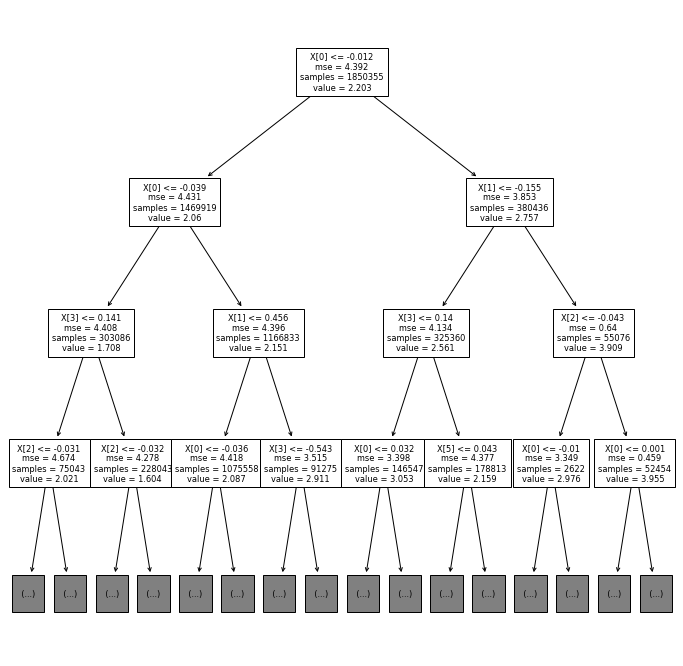

In [167]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, max_depth=3, fontsize=8.3)
plt.show()

Interaction terms were able to increase R-squared while keeping MSE low.

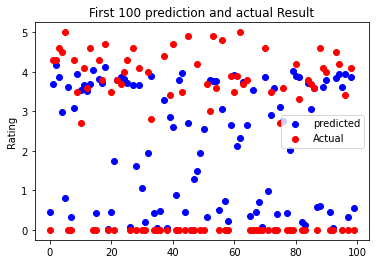

In [136]:
fig, ax = plt.subplots()
ax.scatter(np.arange(0,100),predicted[:100], color = 'blue',label="predicted")
ax.scatter(np.arange(0,100),test_y[:100], color = 'red', label = "Actual")
ax.set_title("First 100 prediction and actual Result")
ax.set_ylabel("Rating")
ax.legend(loc='center right')

Because feature importance was hard to unpack after pca, we thought about fitting the optimal parameters to the original data and see feature importance there. However, this didn't work out because categorical data must be one hot encoded to achieve the effect of the hyperparameters', which wasn't possible because OHE turns a column into several columns. At most, we can interpret the importance of each dimension of the pca.

In [145]:
# y_interaction=data_interaction["Rating"]
# x_interaction=data_interaction.drop("Rating", axis=1)
# for i in binary_feature: # this is trivial so can be kept out of the pipeline
#     x_interaction[i] = le.fit_transform(x_interaction[i])
# x_interaction.head()

In [146]:
# train_x, test_x, train_y, test_y = train_test_split(x_interaction,y_interaction,test_size = 0.2, random_state = 0)